## Grafico de Pie

#### Cuando se utilizar:
- Cuando se quiere comparar las partes porcentuales de un todo


#### Cuado no utilizar:
- Cuando no puedo calcular valores porcentuales
- Cuando hay que mostrar muchas categorias
- Cuando una categoria representa mas del 95% de los datos
- Cuando las categorias son porcentualmente identicas a simple vista (preferible pie chart)

#### Ejemplos de uso:
- Si se desea conocer la proporcion de usuarios que visitan mi pagina web desde un celular, Tablet o PC de escritorio.
- En un banco, si me interesa saber cual es la proporcion que existe entre los diferentes tipos de cuentas bancarias de los usuarios.

#### Consejos
- Se puede utilizar en conjunto con los graficos de barras para mostrar la misma informacion con un enfoque diferente
- No es habitual presentarlo solo
- No utilizar dos pie charts para compararlos entre ellos. Causa confusion y es dificil de leer y comparar, incluso manteniendo un mismo sistema de colores.
- De ser posible, ordena los segmentos de mayor a menor empezando por el centro (90 grados)
- Utilizar colores cuando se desea resaltar una categoria.

## En esta clase

#### Datos
Informacion sobre los pasajeros del Titanic

#### Objetivo
1. Obtener el porcentaje de pasajeros HOMBRES y MUJERES del Titanic

#### Referencias
- https://datavizcatalogue.com/ES/metodos/graficos_de_tarta.html
- https://chartio.com/learn/charts/how-to-choose-pie-chart-vs-bar-chart/
- https://www.storytellingwithdata.com/blog/2020/5/14/what-is-a-pie-chart

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('./data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
pasajeros = df.groupby('Sex').agg({
  'PassengerId': 'count'
})
pasajeros

,PassengerId
Sex,
female,314
male,577


<Axes: ylabel='PassengerId'>

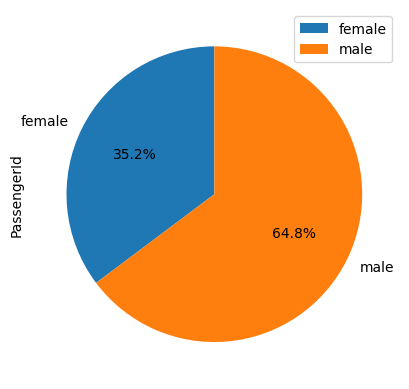

In [4]:
pasajeros.plot.pie(
  y='PassengerId',
  startangle=90,
  autopct='%1.1f%%' # Agrega el porcentaje dentro de la seccion
)

In [5]:
import plotly.express as px
#import plotly
#plotly.offline.init_notebook_mode(connected=True)

In [6]:
# Para tener el indice Sex como una columna
pasajeros2 = pasajeros.reset_index() 
pasajeros2

,Sex,PassengerId
0,female,314
1,male,577


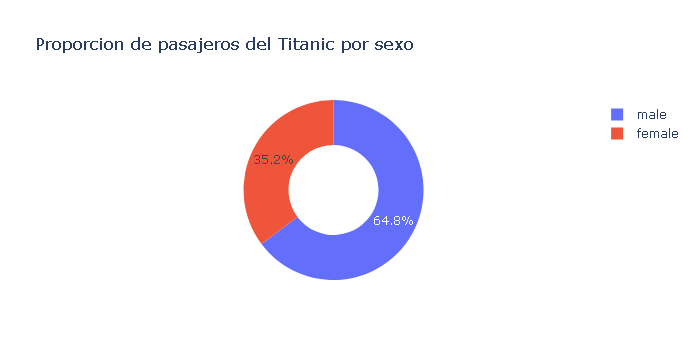

In [31]:
fig = px.pie(
  pasajeros2,
  names='Sex',
  values='PassengerId',
  title='Proporcion de pasajeros del Titanic por sexo',
  hole=0.5
)
fig.show()

#### Practica

In [9]:
clases = df.groupby('Pclass').agg({
  'PassengerId': 'count'
})
clases

,PassengerId
Pclass,
1,216
2,184
3,491


<Axes: ylabel='PassengerId'>

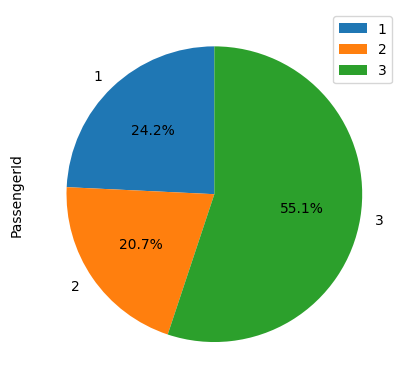

In [ ]:
clases.plot.pie(
  y='PassengerId',
  startangle=90,
  autopct='%1.1f%%',
)

In [10]:
clases2 = clases.reset_index()
clases2

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


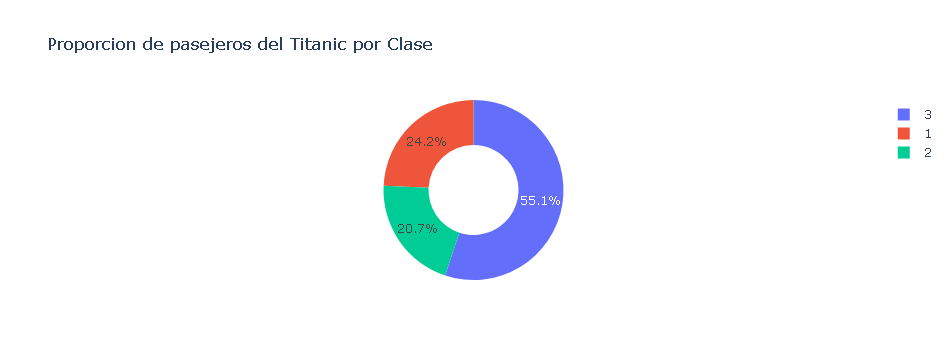

In [29]:
fig2 = px.pie(
  clases2,
  names='Pclass',
  values='PassengerId',
  title='Proporcion de pasejeros del Titanic por Clase',
  hole=0.5
)
fig2.show()